## Imports

In [ ]:
!pip install advertools

In [ ]:
%matplotlib inline

import os
import utils
import re
import nltk
import json
import gensim
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from utils import metrics
import advertools as adv
from utils import clean_dataset
from scipy import sparse
from lightgbm import LGBMRegressor
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from typing import List, Callable, Dict
from googletrans import Translator
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from  utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import sys

random_state=2022

In [ ]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')  

1
1


In [ ]:
path='/content/drive/MyDrive/NLP/'

In [ ]:
df=pd.read_csv(path + '2.csv')

In [ ]:
df

,Unnamed: 0,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,...,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,0,It’s our last Pizza Sunday at the arch today. ...,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.793201,...,0,1,9,0,0,0,0,0,0,1
1,1,New cakes on our counters 😋😋,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.793201,...,0,1,13,0,0,0,1,0,0,0
2,2,🔺Opening Times for Half Term🔺: Hi everyone we ...,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.793201,...,0,1,11,0,0,1,0,0,0,0
3,3,"New addition to our selection of sandwiches, o...",352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.793201,...,0,1,12,0,0,0,0,1,0,0
4,4,We are currently closed as we move into our ne...,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.793201,...,0,1,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,88509,Day 2 Christmas brochure tour Day one brochure...,579.0,10.0,1863.0,2321.0,278.0,150.0,931.5,3.212069,...,0,0,9,0,0,0,0,1,0,0
88510,88510,#ArmisticeDay #poppy #lestwerespect,579.0,50.0,1863.0,2321.0,35.0,150.0,1863.0,3.212069,...,0,0,8,0,0,0,1,0,0,0
88511,88511,There’s only one turkey and the best place to ...,579.0,8.0,1863.0,2321.0,266.0,150.0,1863.0,3.212069,...,0,0,13,0,0,1,0,0,0,0
88512,88512,Day one brochure tour !! #sandysfishmongers #b...,579.0,9.0,1863.0,2321.0,241.0,150.0,1863.0,3.212069,...,0,0,13,0,0,1,0,0,0,0


In [ ]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [ ]:
data=df.astype(str)

In [ ]:
type(data['caption'])

pandas.core.series.Series

## Sentiment Feature

In [ ]:
def sentiment_analysis(caption):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    #Create a function to get the polarity
    def getPolarity(caption):
        return TextBlob(caption).sentiment.polarity
  
    #Create two new columns 'Subjectivity' & 'Polarity'
    data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
    data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)
    return data

sentiment_analysis(data['caption'])

,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,...,Hod,mon,tue,wed,thu,fri,sat,sun,TextBlob_Subjectivity,TextBlob_Polarity
0,It’s our last Pizza Sunday at the arch today. ...,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.7932011331444759,60,...,9,0,0,0,0,0,0,1,0.233333,0.200000
1,New cakes on our counters 😋😋,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.7932011331444759,60,...,13,0,0,0,1,0,0,0,0.454545,0.136364
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.7932011331444759,60,...,11,0,0,1,0,0,0,0,0.147222,-0.080556
3,"New addition to our selection of sandwiches, o...",352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.7932011331444759,60,...,12,0,0,0,0,1,0,0,0.477273,0.085227
4,We are currently closed as we move into our ne...,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.7932011331444759,60,...,5,0,0,0,1,0,0,0,0.444719,0.174416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,579.0,10.0,1863.0,2321.0,278.0,150.0,931.5,3.212068965517241,111,...,9,0,0,0,0,1,0,0,0.000000,0.000000
88510,#ArmisticeDay #poppy #lestwerespect,579.0,50.0,1863.0,2321.0,35.0,150.0,1863.0,3.212068965517241,111,...,8,0,0,0,1,0,0,0,0.000000,0.000000
88511,There’s only one turkey and the best place to ...,579.0,8.0,1863.0,2321.0,266.0,150.0,1863.0,3.212068965517241,111,...,13,0,0,1,0,0,0,0,0.525000,0.500000
88512,Day one brochure tour !! #sandysfishmongers #b...,579.0,9.0,1863.0,2321.0,241.0,150.0,1863.0,3.212068965517241,111,...,13,0,0,1,0,0,0,0,0.000000,0.000000


### Top Hashtags

In [ ]:
hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()
hashtag_summary['top_hashtags'][:10]

[('#fitness', 6318),
 ('#gym', 4889),
 ('#london', 2987),
 ('#workout', 2710),
 ('#edinburgh', 2458),
 ('#fitnessmotivation', 2161),
 ('#health', 2147),
 ('#training', 2103),
 ('#thegymgroup', 1937),
 ('#personaltrainer', 1935)]

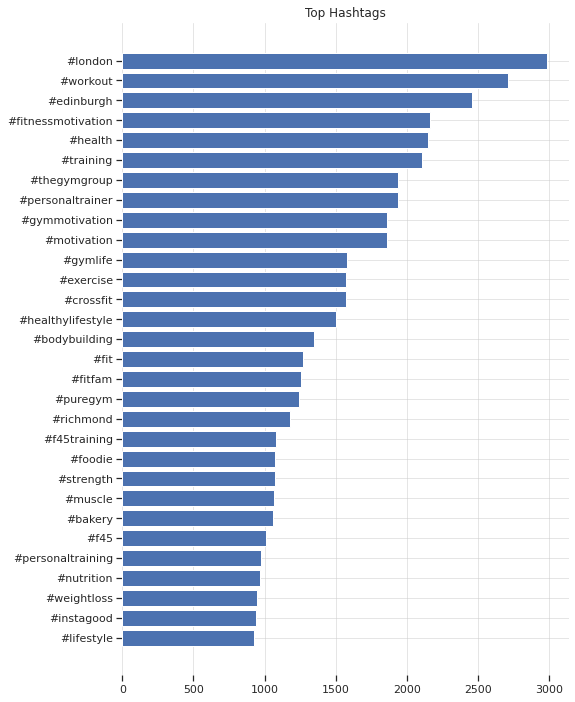

In [ ]:
plt.figure(facecolor='white', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

### Top emoji's

In [ ]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()
emoji_summary['top_emoji'][:10]

[('🔥', 5744),
 ('💪', 5270),
 ('✨', 4556),
 ('❤️', 4211),
 ('⭐', 3996),
 ('✅', 3821),
 ('📸', 3561),
 ('💥', 3186),
 ('😍', 2880),
 ('🙌', 2673)]

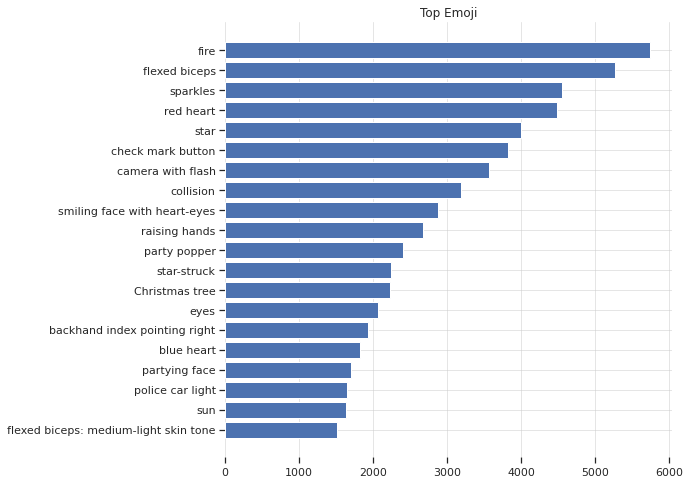

In [ ]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

### Top mentions

In [ ]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()
mentions=mention_summary['top_mentions'][:10]

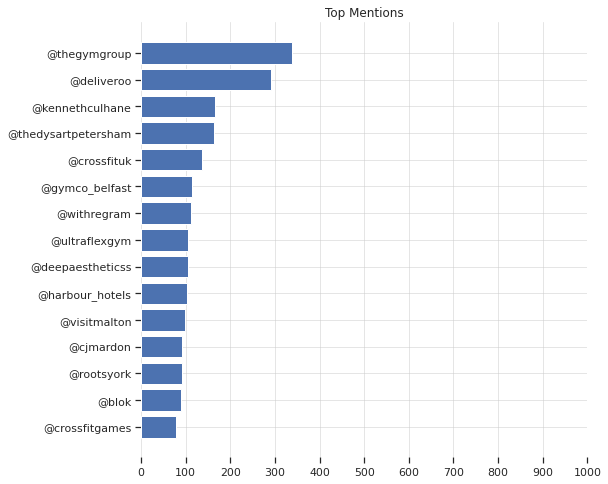

In [ ]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [ ]:
extracted =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
        emoji=emoji_summary['emoji'],
        emoji_text=emoji_summary['emoji_text'],
        emoji_count=emoji_summary['emoji_counts'] 
         ))


extracted.head(5)

,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,It’s our last Pizza Sunday at the arch today. ...,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.7932011331444759,60,...,1,0.233333,0.200000,[],0,[],0,"[🍕, 🍕, 🍕, 🥐, 🥐, 🥐]","[pizza, pizza, pizza, croissant, croissant, cr...",6
1,New cakes on our counters 😋😋,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.7932011331444759,60,...,0,0.454545,0.136364,[],0,[],0,"[😋, 😋]","[face savoring food, face savoring food]",2
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.7932011331444759,60,...,0,0.147222,-0.080556,[],0,[],0,"[🔺, 🔺]","[red triangle pointed up, red triangle pointed...",2
3,"New addition to our selection of sandwiches, o...",352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.7932011331444759,60,...,0,0.477273,0.085227,[],0,[],0,[],[],0
4,We are currently closed as we move into our ne...,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.7932011331444759,60,...,0,0.444719,0.174416,"[#yeastbakery, #eastlondon, #eastlondonfood, #...",4,[],0,[],[],0


In [ ]:
def captionLength(i):
    return len(i)

caption_length = extracted['caption'].apply(captionLength)
extracted['caption_length'] = caption_length

In [ ]:
#Converting the columns into the float datatype
a=['followers']
for i in a:
  extracted[i]= extracted[i].astype(str).astype(float)
extracted

,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,It’s our last Pizza Sunday at the arch today. ...,352.0,29.0,280.0,8702.0,121,149.0,280.0,0.7932011331444759,60,...,1,0.233333,0.200000,[],0,[],0,"[🍕, 🍕, 🍕, 🥐, 🥐, 🥐]","[pizza, pizza, pizza, croissant, croissant, cr...",6
1,New cakes on our counters 😋😋,352.0,44.0,280.0,8702.0,28,149.0,280.0,0.7932011331444759,60,...,0,0.454545,0.136364,[],0,[],0,"[😋, 😋]","[face savoring food, face savoring food]",2
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,352.0,209.0,280.0,8702.0,259,149.0,28.0,0.7932011331444759,60,...,0,0.147222,-0.080556,[],0,[],0,"[🔺, 🔺]","[red triangle pointed up, red triangle pointed...",2
3,"New addition to our selection of sandwiches, o...",352.0,95.0,280.0,8702.0,138,149.0,70.0,0.7932011331444759,60,...,0,0.477273,0.085227,[],0,[],0,[],[],0
4,We are currently closed as we move into our ne...,352.0,101.0,280.0,8702.0,256,149.0,40.0,0.7932011331444759,60,...,0,0.444719,0.174416,"[#yeastbakery, #eastlondon, #eastlondonfood, #...",4,[],0,[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,579.0,10.0,1863.0,2321.0,278,150.0,931.5,3.212068965517241,111,...,0,0.000000,0.000000,"[#sandysfishmongers, #butcher, #fishmonger, #x...",20,[],0,[],[],0
88510,#ArmisticeDay #poppy #lestwerespect,579.0,50.0,1863.0,2321.0,35,150.0,1863.0,3.212068965517241,111,...,0,0.000000,0.000000,"[#armisticeday, #poppy, #lestwerespect]",3,[],0,[],[],0
88511,There’s only one turkey and the best place to ...,579.0,8.0,1863.0,2321.0,266,150.0,1863.0,3.212068965517241,111,...,0,0.525000,0.500000,"[#notjustafishmonger, #butcher, #fishmonger, #...",9,[],0,[],[],0
88512,Day one brochure tour !! #sandysfishmongers #b...,579.0,9.0,1863.0,2321.0,241,150.0,1863.0,3.212068965517241,111,...,0,0.000000,0.000000,"[#sandysfishmongers, #butcher, #fishmonger, #x...",19,[],0,[],[],0


### Hashtag popularity

In [ ]:
word_freq_hash = adv.word_frequency(extracted['hashtags'].str.join(' '), extracted['followers'].fillna(0))
word_freq_hash.head()
# type(word_freq_hash.word)

d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
print(d.get('#chelseabridgeclinic'))
print(d.get('#london'))
print(d.get('#test'))


def countHashtags(tags):
      if len(tags)==0:
        return 0
      sum = 0
      for i in tags:
        sum += (d.get(i))
      return sum/len(tags)

hashtag_average = extracted['hashtags'].apply(countHashtags)
extracted['hashtag_popularity'] = hashtag_average

None
24172.0
2761.0


In [ ]:
extracted.columns

Index(['caption', 'following', 'likes', 'posts_count', 'followers',
       'caption_length', 'biography_length', 'po_co', 'pof', 'user_count',
       'profile_name_len', 'fol', 'act', 'pos', 'comments_max', 'comments_min',
       'comments_mean', 'comments_std', 'comments_followers',
       'followers_comments_mean', 'fol2', 'fol_pos', 'fol_pow', 'po_co_pow',
       'comments_mean_diff', 'INDUSTRY_cosmetics', 'INDUSTRY_hospitality',
       'Hod', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
       'TextBlob_Subjectivity', 'TextBlob_Polarity', 'hashtags', 'hashcounts',
       'mentions', 'mention_count', 'emoji', 'emoji_text', 'emoji_count',
       'hashtag_popularity'],
      dtype='object')

### Preprocessing

In [ ]:
import time
# Config

REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def remove_brackets_from_list(text:str)->str:
    """
    Remove the [] brackets from the each of the list
    """
    return text

def translation(text: str) -> str:
  
    """
    Replaces any non english words to the english language
    """
    translator = Translator()
    res=translator.translate(text, dest='en')
    return res.text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)


In [ ]:
PREPROCESSING_PIPELINE = [
                          clean_mention,
                          clean_hashtags,
                          # translation
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]

# Anchor method

def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1
    return reduce(lambda txt, f: f(txt), filter_methods, text)

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')
print('[Debug] Before:\n{}'.format(extracted.caption[:10]))

L=['hashtags','emoji_text','mentions']
# L=['hashtags','mentions']
A=['caption']

# Replace each sentence with its pre-processed version
extracted['caption'] = extracted['caption'].apply(lambda txt: text_prepare(txt))

for i in L:
  extracted[i]=extracted[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

print('[Debug] After:\n{}'.format(extracted.caption[:10]))
print()

print("Pre-processing completed!")

Pre-processing text...
[Debug] Before:
0    It’s our last Pizza Sunday at the arch today. ...
1                         New cakes on our counters 😋😋
2    🔺Opening Times for Half Term🔺: Hi everyone we ...
3    New addition to our selection of sandwiches, o...
4    We are currently closed as we move into our ne...
5    Weekend treats…\nIncluding the return of our “...
6    New vegan “Chocolate & Toasted Almond Cake wit...
7    Posted @withregram • @londoncoffeeshops Pastri...
8    We are looking for experienced part-time baris...
9    Posted @withregram • @marthadelacey Thrilled f...
Name: caption, dtype: object
[Debug] After:
0    last pizza sunday arch today pizzas available ...
1                                   new cakes counters
2    opening times half term hi everyone wanted let...
3    new addition selection sandwiches roasted aube...
4    currently closed move new exciting space aroun...
5    weekend treatsincluding return coconut custard...
6    new vegan chocolate toasted almo

In [ ]:
extracted.to_csv(path + '3.csv')

### Worldcloud

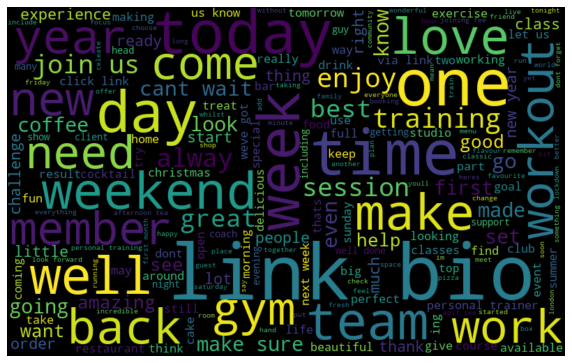

In [ ]:
#Understanding the common words used in the captions: WordCloud

all_words = ' '.join([text for text in extracted['caption']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

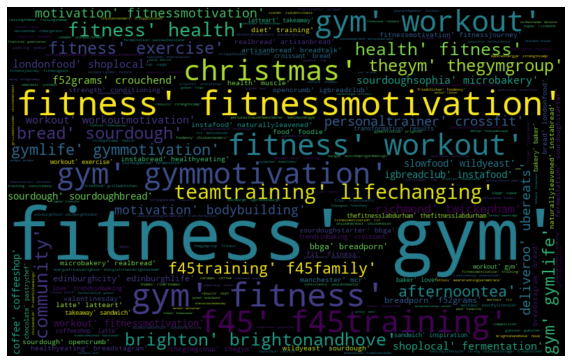

In [ ]:
# Understanding the common words used in the hashtags: WordCloud

normal_words =' '.join([text for text in extracted['hashtags']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

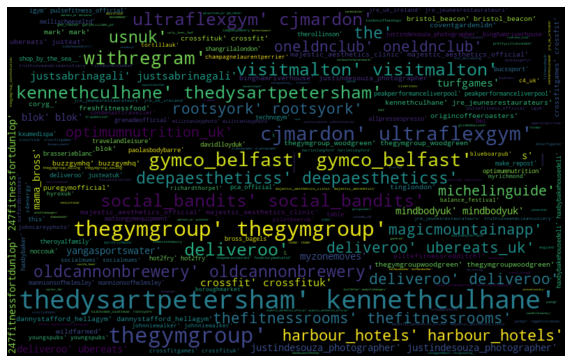

In [ ]:
# Understanding the common words used in the mentions: WordCloud

normal_words =' '.join([text for text in extracted['mentions']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Bag of Words

In [ ]:
bow_caption=Feature_Extraction(extracted['caption'],4,CountVectorizer)
bow_caption
print("\n\n\n")
bow_hashtags=Feature_Extraction(extracted['hashtags'],0,CountVectorizer)
bow_hashtags
print("\n\n\n")
bow_emoji_text=Feature_Extraction(extracted['emoji_text'],0,CountVectorizer)
bow_emoji_text
print("\n\n\n")
bow_mentions=Feature_Extraction(extracted['mentions'],0,CountVectorizer)
bow_mentions
print("\n\n\n")
bow_dataset = pd.DataFrame(np.hstack((bow_caption,bow_hashtags,bow_emoji_text,bow_mentions,extracted)))
bow_dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


always amazing available better chocolate christmas class classes coffee enjoy every everyone favourite first fitness friday going great happy little looking members monday month offer people perfect personal please ready start still sunday thank today training weekend workout would years youre






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


bakery bodybuilding boxing bread breakfast brighton cake cardio chocolate christmas classes cocktails coffee coffeeshop community crossfit davidlloydclubs delicious edinburgh edinburghfood edinburghfoodie edinburghlife exercise f45 f45challenge f45training fatloss fit fitfam fitness fitnessgoals fitnessjourney fitnessmotivation fitspo food foodie foodies foodlover foodphotography goals gym gymlife gymmotivation health healthy healthylifestyle hiit hotel instafit instafood instagood leeds lifestyle london londonfitness londonfood londonlife londonrestaurants love lunch luxury luxuryhotel manchester motivation muscle nutrition personaltrainer personaltraining pt puregym restaurant results richmond scotland sheffield shoplocal sourdough sport staycation strength strengthtraining strong supportlocal takeaway teamtraining teddington thegym thegymgroup training transformation travel twickenham vegan weightlifting weightloss wellbeing wellness workout workoutmotivation york






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


and arrow backhand beaming beer beverage biceps black blossom blue boxing button camera car check cherry christmas circle clapping claus clinking collision dizzy double down drooling exclamation eyes face fire fist flag flash flexed folded food fork glass glasses glove glowing green grinning hand hands heart hearts hot in index joy keycap knife left lifting light man mark medium mobile of ok oncoming orange party partying person phone pizza pointing police popper purple raising red right running savoring skin small smiling sparkles square star struck sun sweat tears the thumbs tone tree two up weights white winking with woman yellow






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


247fitnessfortdunlop alexforman82 andybadco1 binghamriverhouse blackswan_oldstead blok bookingoffice boroughmarket brabo0788 breadaheadbakery bristol_beacon buzzgymhq c4_uk civerinos_slice cjmardon coryg_ crossfit crossfitgames crossfituk dannystafford_hellagym deepaestheticss deliveroo digmeathome elitefitnessredditch1 foodstorymedialtd freshfitnessfood garywilliams_pt gee_robson gymco_belfast harbour_hotels harrietlangford haxbybakehousedeli haxbybaker heckfieldhomefarm hot2fry hyroxuk jermyn johncareyphoto johngillies123 johnniewalker jre_jeunesrestaurateurs jre_uk_ireland justeat justeatuk justindesouza_photographer justsabrinagali kennethculhane lecochonaveugle liftgymsuk magicmountainapp majestic_aesthetics majestic_aesthetics_clinic majestic_aesthetics_official make_repost mama_bross mannionsofhelmsley mark mark_anthony_fox michelinguide mindbodyuk myzonemoves nutrivend oldcannonbrewery oneldnclub optimumnutrition_uk panattaofficial peakperformanceliverpool prideofbritainhotels 

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,0,0,1,0,0,0,0,0,0,0,...,0.233333,0.2,,0,,0,"[🍕, 🍕, 🍕, 🥐, 🥐, 🥐]","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.454545,0.136364,,0,,0,"[😋, 😋]","'face savoring food', 'face savoring food'",2,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.147222,-0.080556,,0,,0,"[🔺, 🔺]","'red triangle pointed up', 'red triangle point...",2,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.477273,0.085227,,0,,0,[],,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,,0,[],,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,,0,[],,0,10095.15
88510,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,,0,[],,0,4333.666667
88511,0,0,0,0,0,1,0,0,0,0,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,,0,[],,0,5195.444444
88512,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,,0,[],,0,10504.315789


In [ ]:
print(len(bow_dataset.columns))
a=len(bow_dataset.columns)-43
print(a)
bow_dataset[len(bow_dataset.columns)-43]
bow_dataset.rename(columns = {a:'likes'}, inplace = True)
df=removeColumnContainString(bow_dataset)

386
343
Couldn't covert 341 to float
Couldn't covert 378 to float
Couldn't covert 380 to float
Couldn't covert 382 to float
Couldn't covert 383 to float


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,372,373,374,375,376,377,379,381,384,385
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.23333333333333334,0.2,0,0,6,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.45454545454545453,0.13636363636363635,0,0,2,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.14722222222222223,-0.08055555555555555,0,0,2,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.4772727272727273,0.08522727272727272,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.44471861471861474,0.1744155844155844,4,0,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.0,0.0,20,0,0,10095.15
88510,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,0.0,3,0,0,4333.666666666667
88511,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.525,0.5,9,0,0,5195.444444444444
88512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,19,0,0,10504.315789473685


In [ ]:
dropped = [8,11,14,28,31,32,33,34,51,52,54,55,56]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,9,10,...,372,373,374,375,376,377,379,381,384,385
0,0.0,0.0,0.142857,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
clean_dataset(normalized_df)

,0,1,2,3,4,5,6,7,9,10,...,372,373,374,375,376,377,379,381,384,385
0,0.0,0.0,0.142857,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

### Train Test split

In [ ]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [ ]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

## Models

### LightGBM

In [ ]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_bow, y_train_bow,eval_set=[(x_train_bow, y_train_bow), (x_test_bow, y_test_bow)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30002]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30003]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30004]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30005]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30006]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30007]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30008]	training's l1: 0.00176336	training's l2: 5.82507e-05	valid_1's l1: 0.00183622	valid_1's l2: 7.47228e-05
[30009]	training's l1: 0.00176336	training's l2: 5.82

In [ ]:
y_pred_lgbm = lgbm.predict(x_test_bow)
lgbm.score(x_test_bow, y_test_bow)

0.5821514454840746

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_bow,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## XGBoost

In [ ]:
# hyperparameterTuning_XGBoost(x_train_bow,y_train_bow)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(x_train_bow, y_train_bow)
y_pred_bow_xgboost = xg_reg.predict(x_test_bow)

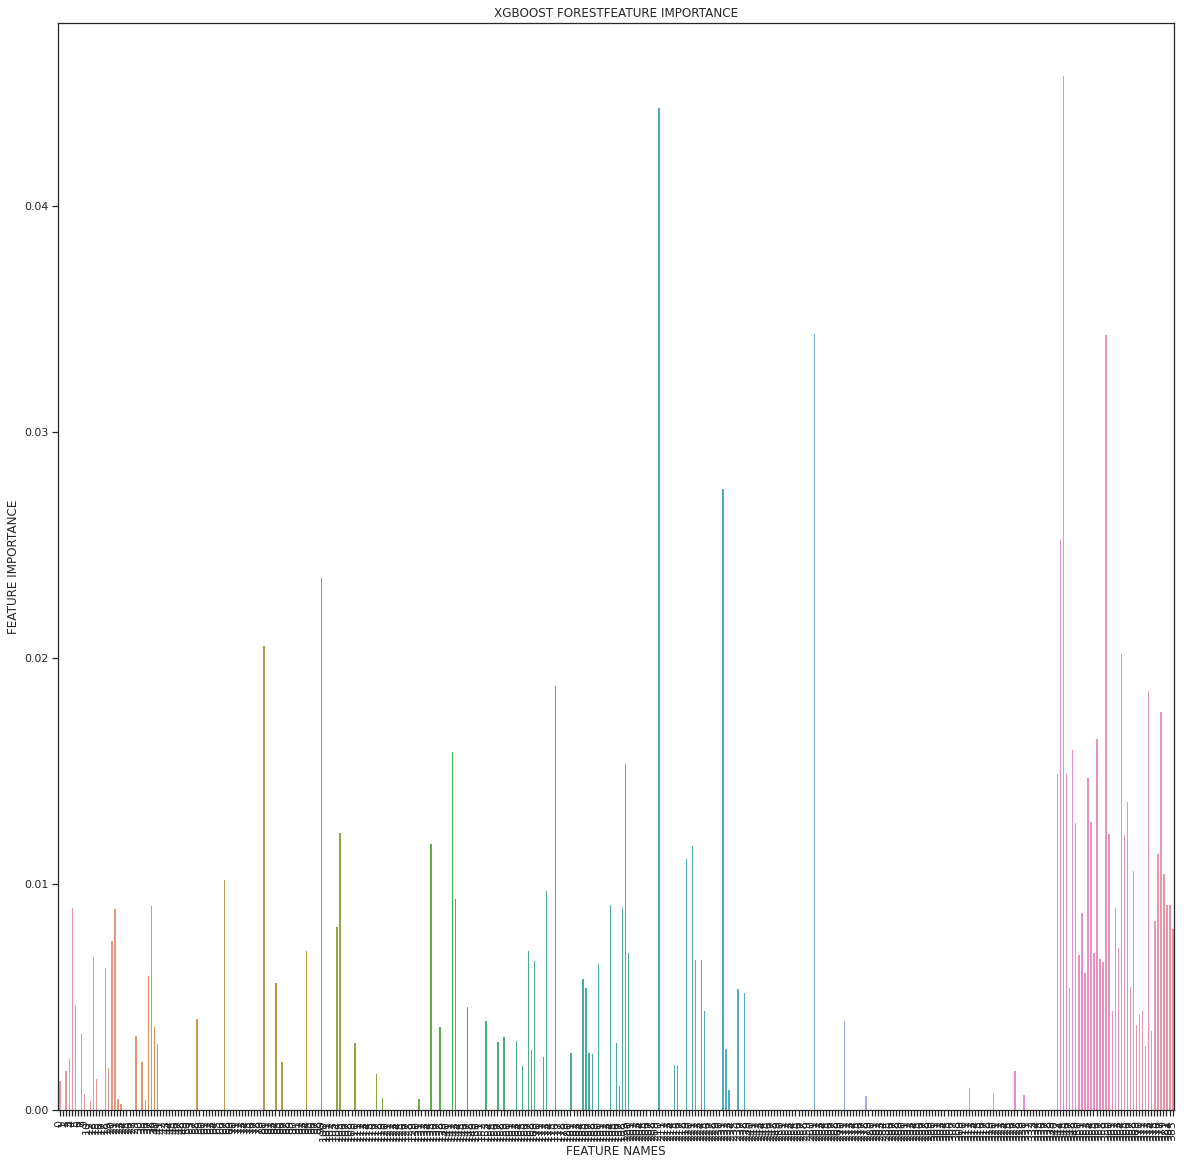

In [ ]:
plot_feature_importance(xg_reg.feature_importances_,x_train_bow.columns,'XGBOOST FOREST')

In [ ]:
a=featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00136
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00179
Feature: 3, Score: 0.00232
Feature: 4, Score: 0.00900
Feature: 5, Score: 0.00470
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00341
Feature: 8, Score: 0.00076
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00047
Feature: 11, Score: 0.00681
Feature: 12, Score: 0.00143
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00632
Feature: 16, Score: 0.00191
Feature: 17, Score: 0.00753
Feature: 18, Score: 0.00895
Feature: 19, Score: 0.00054
Feature: 20, Score: 0.00033
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00332
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00220
Feature: 28, Score: 0.00052
Feature: 29, Score: 0.00597
Feature: 30, Score: 0.00906
Feature: 31, Score: 0.00373
Feature: 32, Score: 0.00297
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [ ]:
# from utils import metrics 
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_bow,y_pred_bow_xgboost)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00136
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00179
Feature: 3, Score: 0.00232
Feature: 4, Score: 0.00900
Feature: 5, Score: 0.00470
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00341
Feature: 8, Score: 0.00076
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00047
Feature: 11, Score: 0.00681
Feature: 12, Score: 0.00143
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00632
Feature: 16, Score: 0.00191
Feature: 17, Score: 0.00753
Feature: 18, Score: 0.00895
Feature: 19, Score: 0.00054
Feature: 20, Score: 0.00033
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00332
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00220
Feature: 28, Score: 0.00052
Feature: 29, Score: 0.00597
Feature: 30, Score: 0.00906
Feature: 31, Score: 0.00373
Feature: 32, Score: 0.00297
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

## Random Forest

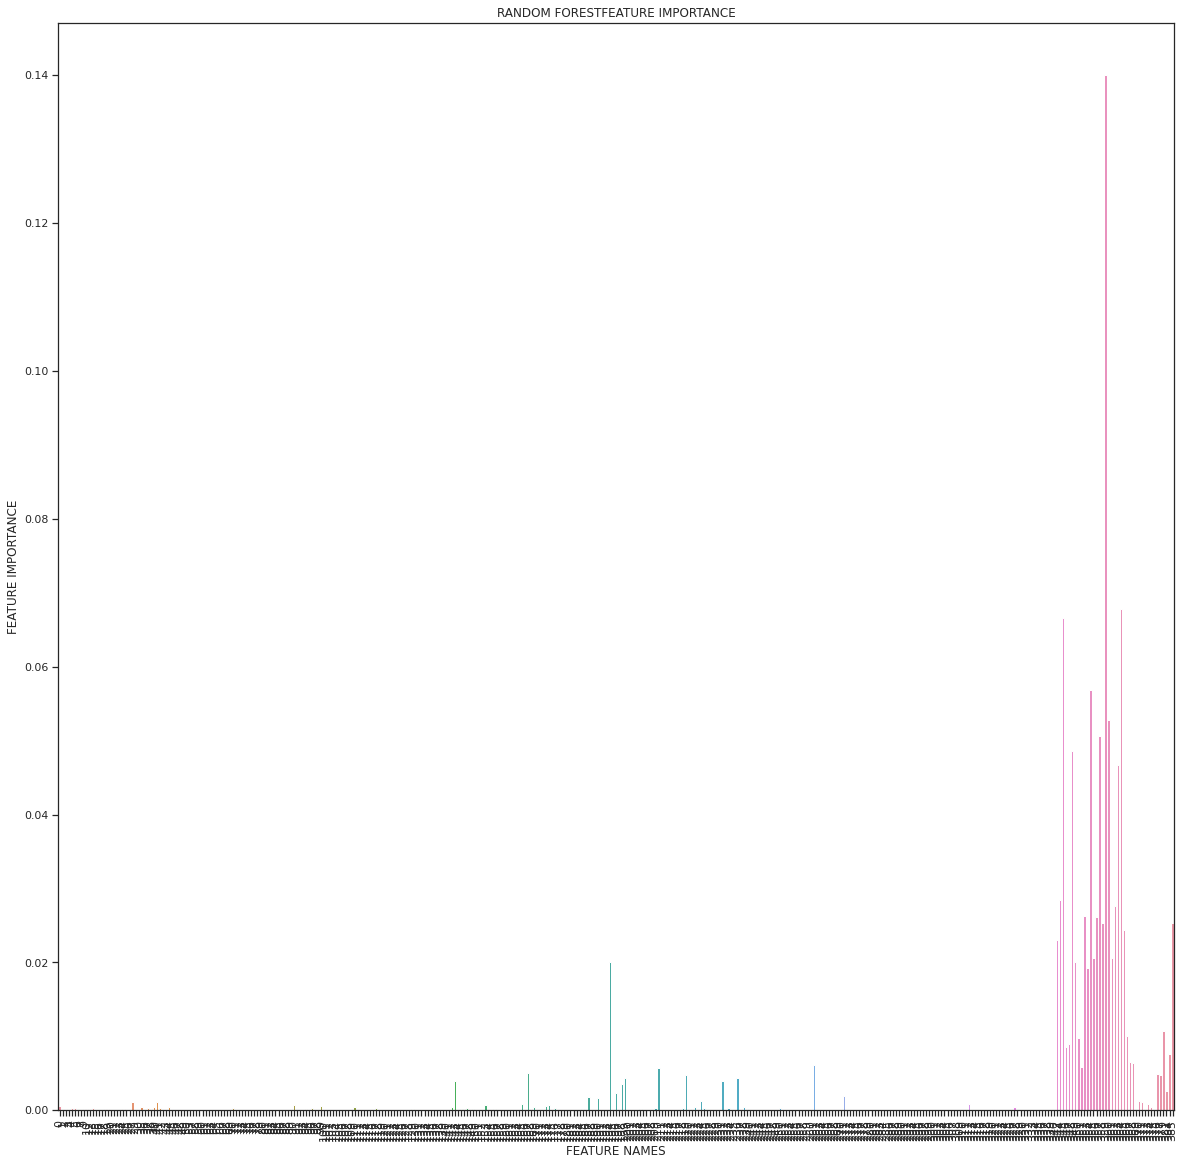

In [ ]:
# hyperparameterTuning_RandomForest(x_train_bow,y_train_bow)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True,random_state=random_state)
rnd_clf.fit(x_train_bow, y_train_bow)
y_pred_bow_random = rnd_clf.predict(x_test_bow)
plot_feature_importance(rnd_clf.feature_importances_,x_train_bow.columns,'RANDOM FOREST')

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_=metrics(y_test_bow,y_pred_bow_random)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
featureScore(rnd_clf.feature_importances_)

Feature: 0, Score: 0.00064
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00022
Feature: 3, Score: 0.00004
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.00027
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00009
Feature: 8, Score: 0.00020
Feature: 9, Score: 0.00014
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00028
Feature: 12, Score: 0.00003
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00012
Feature: 16, Score: 0.00022
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00005
Feature: 24, Score: 0.00107
Feature: 25, Score: 0.00010
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00049
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00035
Feature: 30, Score: 0.00024
Feature: 31, Score: 0.00038
Feature: 32, Score: 0.00109
Feature: 33, Score: 0.00035
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

## MLP 

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(x_train_bow, y_train_bow)
y_pred_bow_mlp = mlp_GS.predict(x_test_bow)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_=metrics(y_test_bow,y_pred_bow_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## SVM

In [ ]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(x_train_bow, y_train_bow)
y_pred_bow_SVR = svr.predict(x_test_bow)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_=metrics(y_test_bow,y_pred_bow_SVR)

In [ ]:
dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.008644,0.582151,0.001836,-4.750863,0.537682
1,XGboost,0.007805,0.659310,0.001491,-4.852936,0.484182
2,Random Forest,0.008736,0.573200,0.001714,-4.740265,0.578521
3,MLP,0.010085,0.431302,0.002363,-4.596747,0.639808
4,SVR,0.013762,-0.059143,0.003252,-4.285814,0.691846
